<h1> Crop Yield Regression</h1>
<ul>
    <li> Import Packages
    <li> Explore Data
    <li> Summary Statistics
    <li> Exploratory Data Analysis
    <li> Data Visulization
    <li> Feature Engineering
    <li> Modeling

<h2> Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h2> Explore Data

In [2]:
df = pd.read_csv("climate-ds.csv")
df.drop(['Unnamed: 0'], axis=1 , inplace=True)
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000


In [3]:
df.shape

(28242, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


<h2> Summary Statistics

In [5]:
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [6]:
df['Area'].nunique()

101

In [7]:
df['Item'].nunique()

10

In [8]:
df['Year'].unique() 

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

<h2> Exploratory Data Analysis

<h4> QUESTIONS </h4>
<ol>
    <li> What is the highest production rate?
    <li> What is the lowest production rate?
    <li> What are the areas with the highest and lowest production rate?
    <li> What are the Years with the highest and lowest production rate?
    <li> What are the areas with the highest and lowest Temperature?
    <li> What are the areas with the highest and lowest Temperature?
    <li> What are the least and most productive crops?
    <li> What are the areas with the highest and lowest rainfall?
    <li> Does temperature affect the rate of production?
    <li> Does rainfall affect production?

In [9]:
# The highest and the lowest production rate
df['hg/ha_yield'].agg([np.max , np.min])

amax    501412
amin        50
Name: hg/ha_yield, dtype: int64

In [10]:
# Area with highest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Area']

2470    Belgium
Name: Area, dtype: object

In [11]:
# Area with lowest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ] ['Area']

26174    Tajikistan
Name: Area, dtype: object

In [12]:
# Year with highest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Year']

2470    2011
Name: Year, dtype: int64

In [13]:
# Year with lowest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ] ['Year']

26174    1992
Name: Year, dtype: int64

In [14]:
# Area with highest Temperature
#df[df['avg_temp'] == df['avg_temp'].max()]
df.groupby('Area')['avg_temp'].max().sort_values(ascending = False).head(1)

Area
Sudan    30.65
Name: avg_temp, dtype: float64

In [15]:
# Area with lowest Temperature
#df[df['avg_temp'] == df['avg_temp'].min()]
df.groupby('Area')['avg_temp'].max().sort_values(ascending = True).head(1)

Area
Norway    4.55
Name: avg_temp, dtype: float64

In [16]:
# The most productive crop
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Item']

2470    Potatoes
Name: Item, dtype: object

In [17]:
# The least productive crop
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ]['Item']

26174    Soybeans
Name: Item, dtype: object

In [18]:
# Area with highest rainfall
#df[df['average_rain_fall_mm_per_year'] == df['average_rain_fall_mm_per_year'].max()]
df.groupby('Area')['average_rain_fall_mm_per_year'].max().sort_values(ascending = False).head(1)

Area
Colombia    3240
Name: average_rain_fall_mm_per_year, dtype: int64

In [19]:
# Area with lowest rainfall
#df[df['average_rain_fall_mm_per_year'] == df['average_rain_fall_mm_per_year'].min()]
df.groupby('Area')['average_rain_fall_mm_per_year'].min().sort_values(ascending = True).head(1)

Area
Egypt    51
Name: average_rain_fall_mm_per_year, dtype: int64



<h5> Lets answer question number 9 with two techniques </h5>

<ul>
    <li> Using Pearson Correlation Coefficient 
    <li> Using scatter plot
 


In [20]:
df_temp_prod = df[['avg_temp' , 'hg/ha_yield']]
df_temp_prod.corr(method = 'pearson')

,avg_temp,hg/ha_yield
avg_temp,1.000000,-0.114777
hg/ha_yield,-0.114777,1.000000


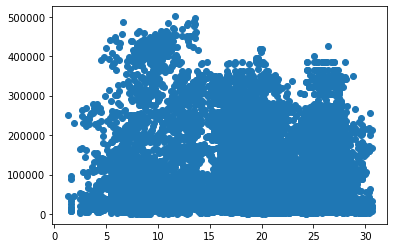

In [21]:
plt.scatter(x= 'avg_temp' , y= 'hg/ha_yield' , data = df)
plt.show()


<h5> Lets answer question number 10 with two techniques </h5>

<ul>
    <li> Using Pearson Correlation Coefficient 
    <li> Using scatter plot

In [22]:
df_rain_prod = df[['average_rain_fall_mm_per_year' , 'hg/ha_yield']]
df_rain_prod.corr(method = 'pearson')

,average_rain_fall_mm_per_year,hg/ha_yield
average_rain_fall_mm_per_year,1.000000,0.000962
hg/ha_yield,0.000962,1.000000


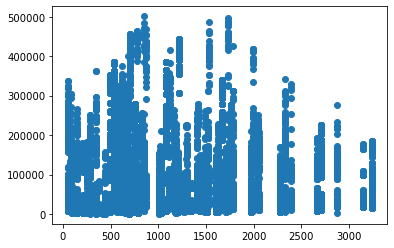

In [23]:
plt.scatter(x = 'average_rain_fall_mm_per_year' , y= 'hg/ha_yield' , data = df)
plt.show()

<h2> Data Visulization

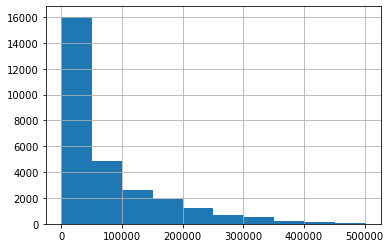

In [24]:
df['hg/ha_yield'].hist()
plt.show()

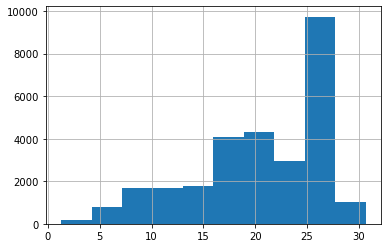

In [25]:
df['avg_temp'].hist()
plt.show()

<AxesSubplot:>

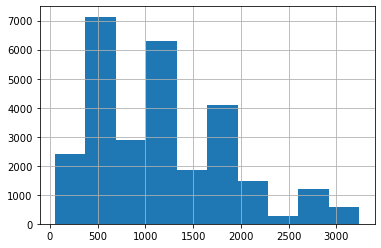

In [26]:
df['average_rain_fall_mm_per_year'].hist()

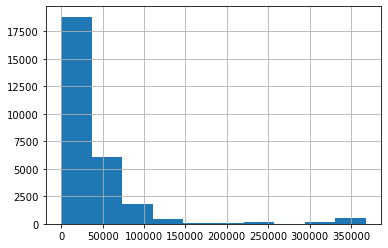

In [27]:
df['pesticides_tonnes'].hist()
plt.show()

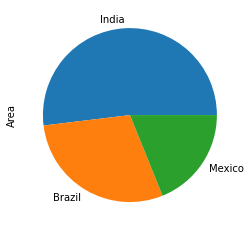

In [28]:
df['Area'].value_counts()[:3].plot(kind='pie')
plt.show()

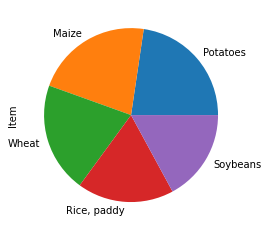

In [29]:
df['Item'].value_counts()[:5].plot(kind='pie')
plt.show()

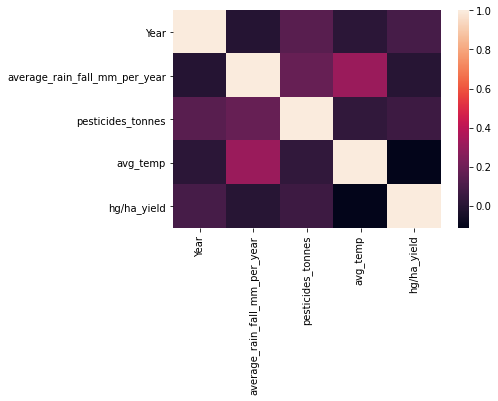

In [30]:
sns.heatmap(df.corr())
plt.show()

<h2> Feature Engineering

In [31]:
df_ohe = pd.get_dummies(df, columns=['Area',"Item"])
df_ohe.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485,121.0,16.37,36613,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485,121.0,16.37,66667,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485,121.0,16.37,23333,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485,121.0,16.37,12500,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485,121.0,16.37,7000,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']
df_ohe[cols]= sc.fit_transform(df_ohe[cols])
df_ohe.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,-1.637075,0.473294,-0.616366,-0.661069,36613,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,0.473294,-0.616366,-0.661069,66667,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,0.473294,-0.616366,-0.661069,23333,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,0.473294,-0.616366,-0.661069,12500,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,0.473294,-0.616366,-0.661069,7000,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
y = df_ohe['hg/ha_yield']
X= df_ohe.drop('hg/ha_yield',axis=1)
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<h2> Modeling 

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [36]:
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.978691312724889

In [37]:
gbr=GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=0)
gbr.fit(x_train , y_train)
y_pred = gbr.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.9635782905032044

In [38]:
rf =RandomForestRegressor(n_estimators=300, max_depth=5, random_state=0)
rf.fit(x_train , y_train)
y_pred = rf.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.8170027476313629